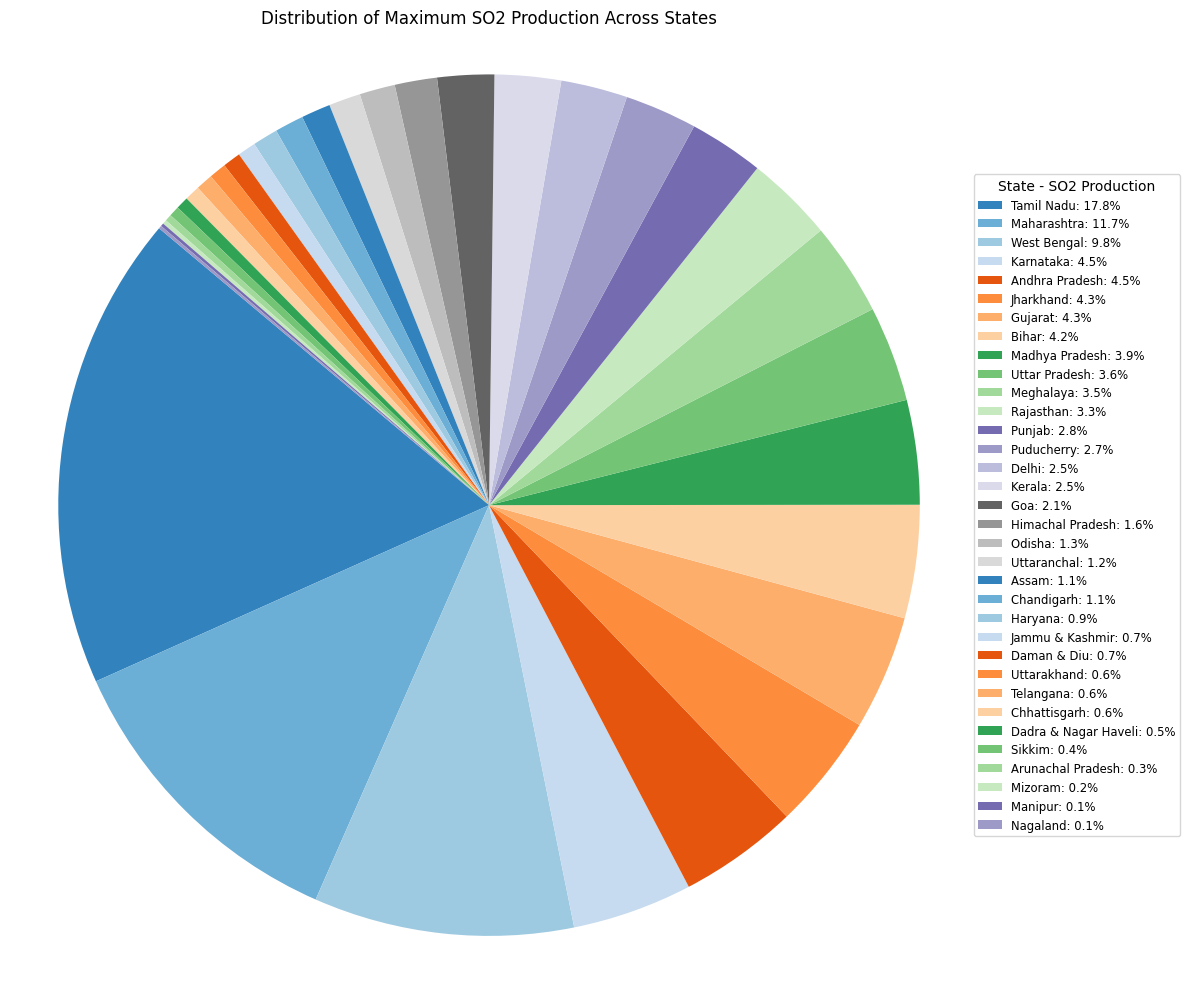

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from cleaning_data import Environment


class SO2PieChart:
    def __init__(self, data):
        self.data = data

    def process_data(self):
        # Convert data to DataFrame if necessary
        if not isinstance(self.data, pd.DataFrame):
            self.data = pd.DataFrame(self.data)

        # Drop rows with NaN values
        self.data.dropna(subset=["so2"], inplace=True)

        # Sort data by SO2 levels
        self.data.sort_values(by="so2", ascending=False, inplace=True)

    def plot_chart(self):
        plt.figure(figsize=(12, 10))
        patches, texts = plt.pie(
            self.data["so2"],
            startangle=140,
            pctdistance=0.85,
            colors=plt.cm.tab20c.colors,
        )

        total_so2 = self.data["so2"].sum()
        legend_labels = [
            f"{state}: {so2/total_so2*100:.1f}%"
            for state, so2 in zip(self.data["state"], self.data["so2"])
        ]

        plt.legend(
            patches,
            legend_labels,
            loc="center left",
            fontsize="small",
            bbox_to_anchor=(1, 0.5),
            title="State - SO2 Production",
        )
        plt.axis("equal")
        plt.title("Distribution of Maximum SO2 Production Across States")
        plt.tight_layout()
        plt.show()


# Initialize Environment with file path
environment = Environment(
    r"C:\Users\admin\Desktop\Environmental-Data-Visualization-\data\data.csv"
)


# Get the data using state_max_so2 method
state_max_so2_data = environment.state_max_so2()

# Create DataFrame from the output of state_max_so2
state_max_so2_df = pd.DataFrame(state_max_so2_data).reset_index()

# Plot chart using the DataFrame
so2_chart = SO2PieChart(state_max_so2_df)
so2_chart.process_data()
so2_chart.plot_chart()